In [1]:
import nltk

In [2]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> stopwords
Command 'stopwords' unrecognized

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


        C:\Users\yaswa\AppData\Roaming\nltk_data...
      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [11]:
import pandas as pd

data = pd.read_csv('SMSSpamCollection',sep='\t',names=['label','message'])

In [12]:
data

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [13]:
data.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [15]:
data.groupby('label').describe().transpose()

label                              ham  \
message count                     4825   
        unique                    4516   
        top     Sorry, I'll call later   
        freq                        30   

label                                                        spam  
message count                                                 747  
        unique                                                653  
        top     Please call our customer service representativ...  
        freq                                                    4

In [16]:
data['length']= data['message'].apply(len)

In [17]:
data

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


<Axes: ylabel='Frequency'>

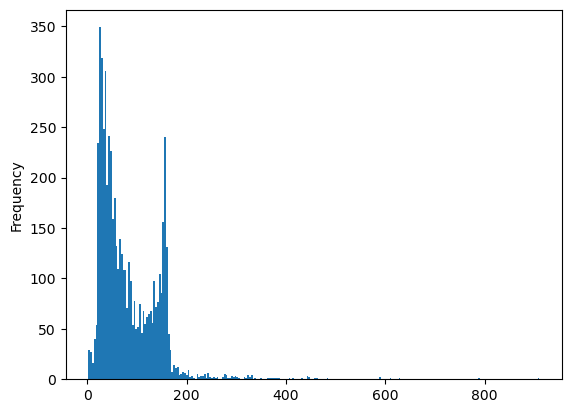

In [24]:
data['length'].plot(kind='hist',bins=250)

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

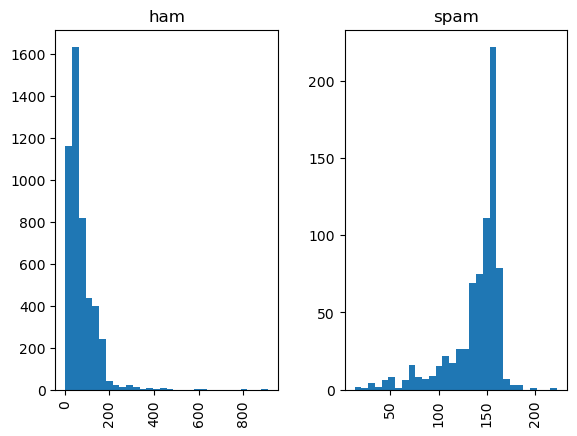

In [37]:
data.hist(column='length',by='label',bins=30)

In [45]:
import string
from nltk.corpus import stopwords

In [53]:
def process(mess):
    
    no_punc =[word for word in mess if word not in string.punctuation]
    no_punc =''.join(no_punc)
    no_punc =[word for word in no_punc.split() if word not in stopwords.words('english')]
    return no_punc

In [54]:
print(process('i am yash working with ramki'))

['yash', 'working', 'ramki']


In [55]:
 data['message'].apply(process)

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, I, dont, think, goes, usf, lives, around...
                              ...                        
5567    [This, 2nd, time, tried, 2, contact, u, U, £75...
5568             [Will, ü, b, going, esplanade, fr, home]
5569                     [Pity, mood, Soany, suggestions]
5570    [The, guy, bitching, I, acted, like, id, inter...
5571                              [Rofl, Its, true, name]
Name: message, Length: 5572, dtype: object

In [58]:
from sklearn.feature_extraction.text import CountVectorizer



In [61]:
from sklearn.feature_extraction.text import CountVectorizer

In [68]:
bow_transformer= CountVectorizer(analyzer=process).fit(data['message'])
print(len(bow_transformer.vocabulary_))

11617


In [69]:
mess4 = data['message'][3]
mess4

'U dun say so early hor... U c already then say...'

In [71]:
bow4=bow_transformer.transform([mess4])

In [72]:
print(bow4)

  (0, 4221)	2
  (0, 4821)	1
  (0, 5453)	1
  (0, 6396)	1
  (0, 6414)	1
  (0, 7378)	1
  (0, 9746)	2


In [75]:
# print(bow_transformer.get_feature_names()[4221])
# print(bow_transformer.get_feature_names()[7378])

In [76]:
messages_bow = bow_transformer.transform(data['message'])

In [77]:
messages_bow.shape

(5572, 11617)

In [79]:
messages_bow.nnz

56024

In [101]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4=tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 9746)	0.5385626262927564
  (0, 7378)	0.4389365653379857
  (0, 6414)	0.3187216892949149
  (0, 6396)	0.29953799723697416
  (0, 5453)	0.29729957405868723
  (0, 4821)	0.26619801906087187
  (0, 4221)	0.40832589933384067


In [102]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

8.527076498901426


In [103]:
messages_tfidf=tfidf_transformer.transform(messages_bow)


In [104]:
from sklearn.naive_bayes import MultinomialNB

In [105]:
Spam_Detection_Model = MultinomialNB().fit(messages_tfidf,data['label'])

In [112]:
print(Spam_Detection_Model.predict(tfidf4))
print(data['label'][3])

['ham']
ham


In [115]:
all_pred = Spam_Detection_Model.predict(messages_tfidf)

In [116]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [119]:
from sklearn.metrics import classification_report
print (classification_report(data['label'], all_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.84      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



In [121]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = train_test_split(data['message'], data['label'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

4457 1115 5572


In [123]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=process)), 
    ('tfidf', TfidfTransformer()),  
    ('classifier', MultinomialNB()), 
])

In [125]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function process at 0x000001E89F046B90>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [131]:
pred =pipeline.predict(msg_test)

In [132]:
print(classification_report(label_test,pred))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97       952
        spam       1.00      0.70      0.82       163

    accuracy                           0.96      1115
   macro avg       0.98      0.85      0.90      1115
weighted avg       0.96      0.96      0.95      1115

